### Recreating Developer's Output 

#### Github Repository of Developer : https://git.gfz-potsdam.de/danschef/arosics 
#### AiDash Repository : 

In [14]:
import os
import tempfile
from osgeo import gdal
import arosics
from geoarray import GeoArray
from arosics import COREG_LOCAL
from arosics import COREG
import os
import string 
import urllib.parse
from urllib.request import pathname2url
from pathlib import Path

!conda install -c conda-forge arosics

!conda install -c conda-forge earthengine-api

In [4]:
im_reference = r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\ref_S2A_20160608T153121_T33UUU_sub.tif"
im_target = r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\tgt_S2A_20160529T153631_T33UUU_sub.tif"
#im_out = '/Users/kanishkvarshney/Desktop/Workspace/Data/CoregistrationData/Tristate/coreg_data/7_8/coreg.tif'
#im_teipoints = '/Users/kanishkvarshney/Desktop/Workspace/Data/CoregistrationData/Tristate/coreg_data/7_8/tiepoints.png'

In [5]:
def update_crs(filepath):
    """Change input raster CRS to EPSG:4326"""
    print(f"applying CRS transformation to EPSG:4326 on {filepath}")
    temp_output = tempfile.NamedTemporaryFile(suffix=".tiff").name
    for epsg in ["EPSG:4326"]:
        gdal.Warp(temp_output, filepath, dstSRS=epsg)

    return temp_output

im_reference = update_crs(im_reference)
im_target = update_crs(im_target)

applying CRS transformation to EPSG:4326 on C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\ref_S2A_20160608T153121_T33UUU_sub.tif
applying CRS transformation to EPSG:4326 on C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\tgt_S2A_20160529T153631_T33UUU_sub.tif


In [10]:
kwargs = {
                 'grid_res': 64,
                 'max_points': None,
                 'window_size': (16, 16),
                 'path_out':  None,
                 'r_b4match':  1,
                 's_b4match': 1,
                 'max_shift' : 16,
                 'tieP_filter_level': 0,
                 'min_reliability': 10,
                 'rs_tolerance': 2.5,
                 'align_grids': True,
                 'match_gsd': False,
                 'out_gsd': None,
                 'target_xyGrid': None,
                 'resamp_alg_deshift': 'cubic',
                 'resamp_alg_calc': 'cubic',
                 'footprint_poly_ref': None,
                 'footprint_poly_tgt': None,
                 'data_corners_ref': None,
                 'data_corners_tgt': None,
                 'nodata': (None, None),
                 'calc_corners': True,
                 'binary_ws': True,
                 'force_quadratic_win': True,
                 'mask_baddata_ref': None,
                 'mask_baddata_tgt': None,
                 'progress': True,
                 'v': True,
                 'q': True
} 

resolutions:  0.0001161855210064171 0.00011263187147731443
77.28 percent of the image to be shifted is covered by the reference image.
Matching window position (X,Y): 12.71112937605663/52.756807925123695
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (1158 points) using 12 CPU cores...
Found 587 matches.
Visualizing CoReg points grid...
Note: array has been downsampled to 1000 x 897 for faster visualization.


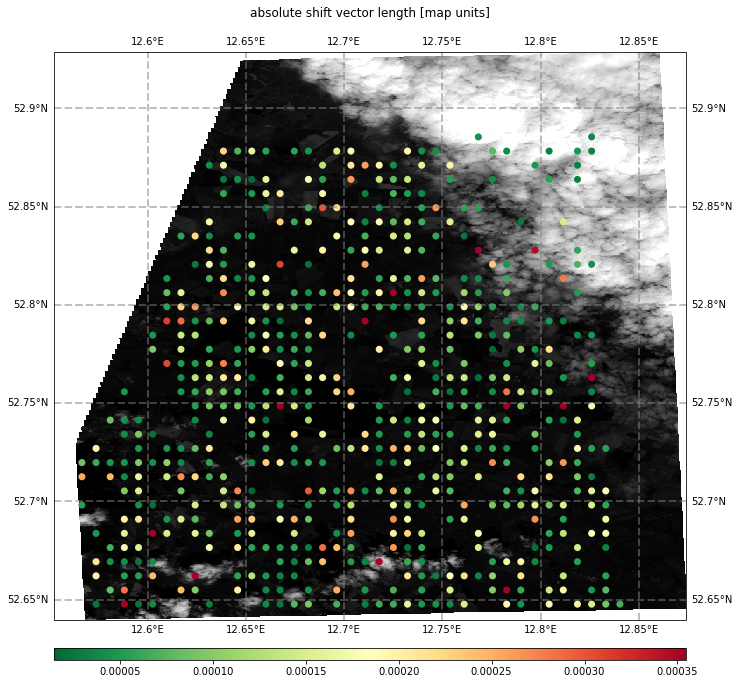

C:\Users\vasud\.conda\envs\coreg_build\lib\site-packages\arosics\DeShifter.py:296: UserWarning: 
The coordinate grid of tmpuf4kyxju cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.00011263187147731443/0.00011263187147731443; desired [X/Y]: 0.00011618552100678414/0.0001161855210085605). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  % (self.im2shift.basename, in_xgsd, in_ygsd, out_xgsd, out_ygsd))


Correcting geometric shifts...
Time for shift correction: 1.16s


OrderedDict([('band', None),
             ('is shifted', True),
             ('is resampled', True),
             ('updated map info',
              ['Geographic Lat/Lon',
               1.0,
               1.0,
               12.552079882883548,
               52.92877083752124,
               0.00011263187147747544,
               0.00011263187147392273,
               'WGS-84']),
             ('updated geotransform',
              (12.552079882883548,
               0.00011263187147747544,
               0.0,
               52.92877083752124,
               0.0,
               -0.00011263187147392273)),
             ('updated projection',
              'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
             ('arr_shifted',


In [11]:
CRL = COREG_LOCAL(im_reference, im_target, **kwargs)
CRL.calculate_spatial_shifts()
CRL.correct_shifts() 

In [12]:
CRL.CoRegPoints_table

,geometry,POINT_ID,X_IM,Y_IM,X_MAP,Y_MAP,REF_BADDATA,TGT_BADDATA,X_WIN_SIZE,Y_WIN_SIZE,...,Y_SHIFT_PX,X_SHIFT_M,Y_SHIFT_M,ABS_SHIFT,ANGLE,SSIM_BEFORE,SSIM_AFTER,SSIM_IMPROVED,RELIABILITY,LAST_ERR
0,POINT (12.71066555792361 52.88552019887396),298,1408,384,12.710666,52.885520,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
1,POINT (12.71787399769816 52.88552019887396),299,1472,384,12.717874,52.885520,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
2,POINT (12.7250824374727 52.88552019887396),300,1536,384,12.725082,52.885520,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
3,POINT (12.73229087724725 52.88552019887396),301,1600,384,12.732291,52.885520,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
4,POINT (12.7394993170218 52.88552019887396),302,1664,384,12.739499,52.885520,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,POINT (12.57370520220719 52.64043324653932),1843,192,2560,12.573705,52.640433,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
1154,POINT (12.58091364198174 52.64043324653932),1844,256,2560,12.580914,52.640433,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
1155,POINT (12.58812208175629 52.64043324653932),1845,320,2560,12.588122,52.640433,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...
1156,POINT (12.59533052153084 52.64043324653932),1846,384,2560,12.595331,52.640433,False,False,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,Matching window in target image is larger than...


Note: array has been downsampled to 1000 x 897 for faster visualization.
Calculating tie point grid (1094 points) using 12 CPU cores...
Found 563 matches.


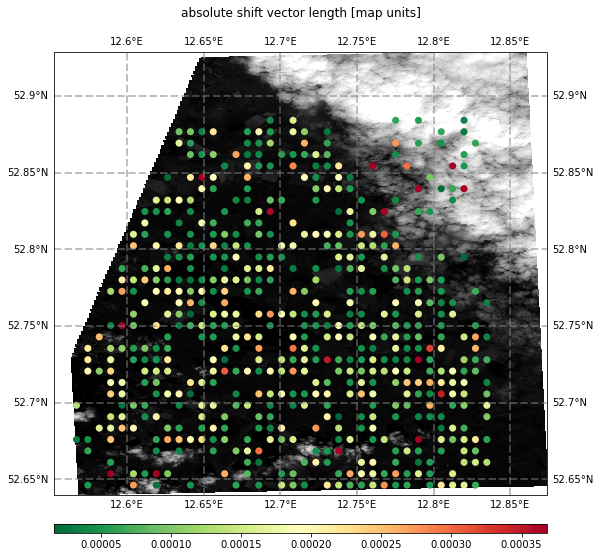

In [21]:
CRL.view_CoRegPoints(hide_filtered = False)

### Global Coregistration

In [15]:
CRL_G = COREG(im_reference, im_target)

Polygonize progress     |==========================------------------------| 51.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00
Polygonize progress     |================================------------------| 63.0% Complete  => 0:00:00

Bounding box of calculated footprint for reference image:
	(12.509607015592545, 52.59378290794021, 12.844221316091026, 52.887848461607454)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(12.56289254254537, 52.63975745531045, 12.874207035308668, 52.92877083752124)
Matching window position (X,Y): 12.71112937605663/52.756807925123695


In [17]:
CRL_G.calculate_spatial_shifts()

Detected integer shifts (X/Y):                            -1/1
Detected subpixel shifts (X/Y):                           0.2764387435684453/0.46931732000574805
Calculated total shifts in fft pixel units (X/Y):         -0.7235612564315548/1.469317320005748
Calculated total shifts in reference pixel units (X/Y):   -0.7235612564315548/1.469317320005748
Calculated total shifts in target pixel units (X/Y):      -0.7463903463194275/1.5156757684080948
Calculated map shifts (X,Y):				  -8.406734155919082e-05/-0.0001707133983472886
Calculated absolute shift vector length in map units:     0.0001902902580063144
Calculated angle of shift vector in degrees from North:   26.21781327848802
Original map info: ['Geographic Lat/Lon', 1.0, 1.0, 12.552079882883548, 52.92877083752124, 0.00011263187147731443, 0.00011263187147731443, 'WGS-84']
Updated map info:  ['Geographic Lat/Lon', 1.0, 1.0, '12.55199581554199', '52.928600124122894', 0.00011263187147731443, 0.00011263187147731443, 'WGS-84']
Image similar

'success'

In [18]:
CRL_G.correct_shifts() 

Warping progress     |--------------------------------------------------| 0.0% Complete  => 0:00:00

Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:01


OrderedDict([('band', None),
             ('is shifted', True),
             ('is resampled', True),
             ('updated map info',
              ['Geographic Lat/Lon',
               1.0,
               1.0,
               12.552108447413467,
               52.92871275599437,
               0.00011263187147747544,
               0.00011263187147392273,
               'WGS-84']),
             ('updated geotransform',
              (12.552108447413467,
               0.00011263187147747544,
               0.0,
               52.92871275599437,
               0.0,
               -0.00011263187147392273)),
             ('updated projection',
              'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
             ('arr_shifted',


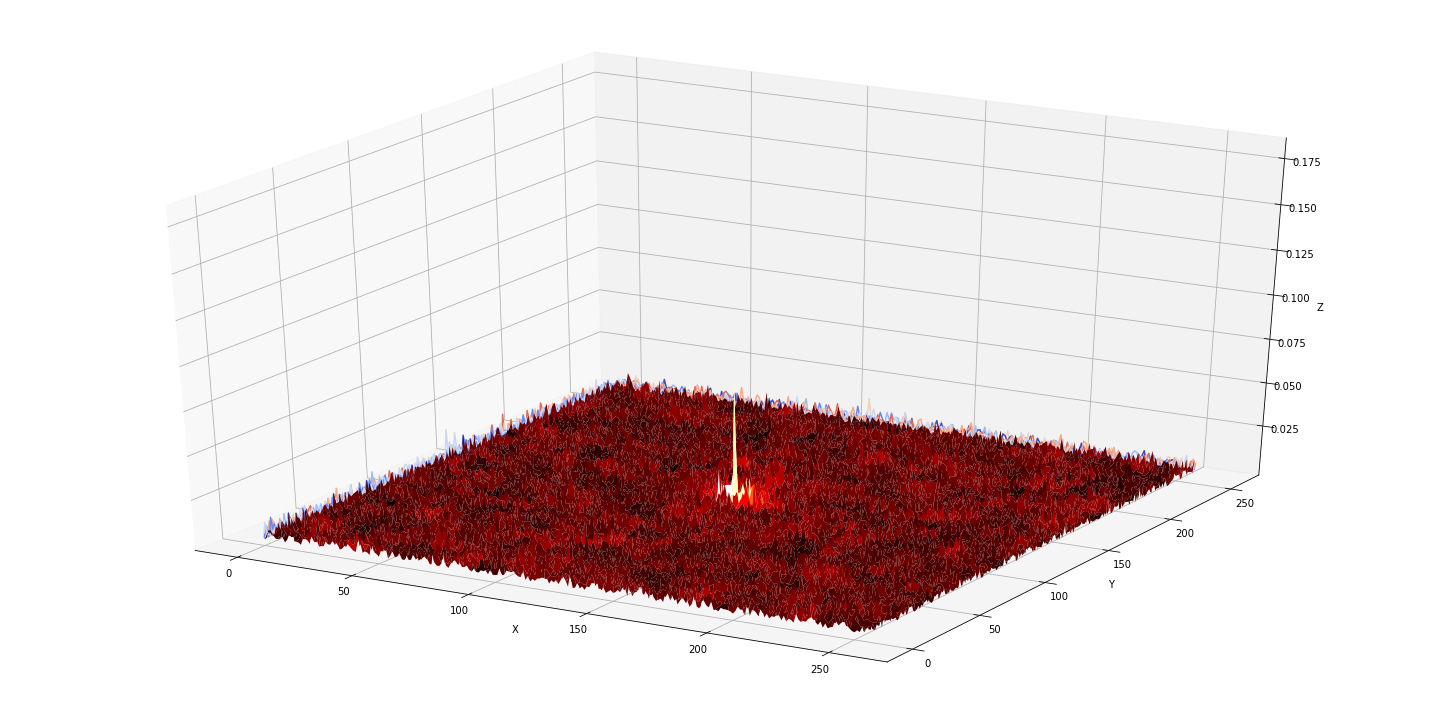

In [19]:
CRL_G.show_cross_power_spectrum()

In [22]:
CRL_G.show_image_footprints()